<a href="https://colab.research.google.com/github/akmal1994/Akmal-Jah-Quamri/blob/master/1_Credit_Card_Default_with_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Need to install  'imblearn' Library: A one time Exercise

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### Import the Dataset

In [ ]:
import numpy as np
import pandas as pd
mydata=pd.read_csv("creditcard.csv")

In [ ]:
mydata=pd.read_csv("creditcard.csv")

In [ ]:
mydata.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Prepare X & Y

In [ ]:
X=mydata.iloc[:,1:-1]

In [ ]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y=mydata.iloc[:,-1]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Check for Data Imbalance

In [ ]:
from collections import Counter
Counter(y)

Counter({0: 284315, 1: 492})

In [ ]:
#from imblearn.under_sampling import TomekLinks

In [ ]:
#tl= TomekLinks()

In [ ]:
#X_res,y_res = tl.fit_resample(X,y)

In [ ]:
#Counter(y_res)

### Apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

### sampling_strategy of 0.01 here makes the monority class 1% of Majority class using SMOTE. 
#### Refer to Documentation from More details

In [ ]:
sm=SMOTE(sampling_strategy=0.01)

### X_res= Resampled X and y_res= Resampled y

In [ ]:
X_res,y_res = sm.fit_resample(X,y)

In [ ]:
Counter(y_res)

Counter({0: 284315, 1: 2843})

### Start Applying the algorithm on X_res & y_res 

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [ ]:
#Convert Everythign inot numpy arrays
x_train=X_train.values
x_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9979527874803457

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[93832,    37],
       [  157,   737]])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

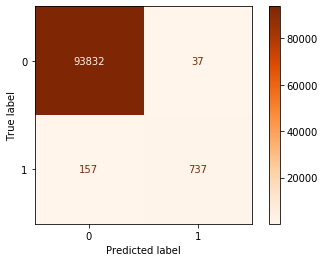

In [ ]:
cm=plot_confusion_matrix(model,x_test,y_test,cmap='Oranges',values_format='.5g')

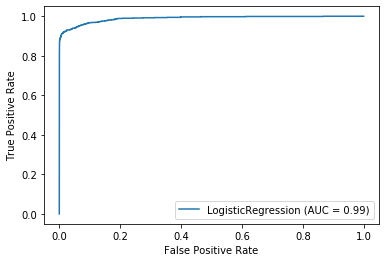

In [ ]:
from sklearn.metrics import plot_roc_curve
curve=plot_roc_curve(model,x_test,y_test)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_test,y_pred)

0.8243847874720358

## Further Work

### You can also try changing the sampling strategy and then do Model Evaluation


### Further you can apply different algorithms like SVM , Random Forest etc and Evaluate which model Performs better